<a href="https://colab.research.google.com/github/SchmidtdIlya/Attempt_optimizer/blob/main/Ising_model_attempt_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ising machine

---



1. Для реализации на CPU применимы метод Монте-Карло (алгоритм демона, мегаполиса,алгоритм тепловой ванны, функция Глаубера), матричный подход.
2. Реализация на GPU - основана нейронная сеть Хопфилда.
3. Классический отжиг, термический отжиг, квантовый отжиг, фотонный отжиг..
4. Оптическая реализация (нелинейная оптика, ОПО и программируемая вентильная матрица...) 

Для решения проблем бинарной оптимизации используются в основном два подхода: на основе квантовых вентилей (модель квантовых цепей) и на базе квантового отжига (модель адиабатических квантовых вычислений).

Точное решение модели Изинга Модель Изинга при Jij=J решена точно для одномерного и двумерного случаев В одномерном случае для бесконечной системы фазовый переход «ферромагнетик – парамагнетик» отсутствует, и магнитный момент является аналитической функцией температуры и внешнего поля:


$$ R-\frac{1}{N}\frac{δF}{δH}-\frac{sh(Hβ)}{\sqrt[]{sh^2(Hβ)+4e^{-4βJ}}}$$


Когерентные мвшины Изинга используют формальное сходство между Гамильтонианом Изинга и Гамильтонианом бистабильных мешающих когерентных оптических состояний для реализации крупномасштабных Ising машин с сетями связанных оптических состояний.


#Одномерная модель
Рассмотрим решетку из N узлов, где каждому i-му узлу соответствует число $s_i=±1$, характеризующее направление магнитного момента системы ($s_i=+1$, если спин ориентирован в положительном направлении OZ, $s_i=-1$, если в отрицательном), при условии того что рассмативаются частицы с полуцелым спином, но без введения углового момента.
Макроскопическое свойство системы (*T,V,N*) характеризуется свойствами ее достижимыъ микросостояний. И любое микросостояние решетки задается набором переменных $${\{s_1,s_2,...,s_N\}}$$. Необходимо вычислить зависимость энергии *E* от конфигурации спинов, когда полная энергия при наличии магнитного поля h: $$E=-J\sum_{<i,j>}^Ns_is_j-h\sum_{i=1}^Ns_i$$ ${<i,j>}$-обозначает, что сумма по всем ближайшим соседним парам спинов, константа обменной связи ***J*** характеризует силу взаимодействия соседних спинов. Если $J>0$ то в состоянии $↓↓ и\uparrow\uparrow$ энергетически выгоднее состояния протвоположной ориентации направлений, соответсвенно ожидаемо, что состояние с наименьшей полной энергией является ферромагнитным. Если $J<0$, то более энергетически выгодными оказываюся состояния $\uparrow↓,↓\uparrow$ и среднее число спинов соориентированных в одном направлении равно нулю, антиферромагнитное состояние (спины параллельны через один). При наложении внешнего магнитного поля спины приобретают дополнительную внутреннюю энергию *-h, +h*.
Используемы основные упрощающие положения в основе модели:

1.   Кинетическая энергия узлов решетки равна нулю.
2.   В описании энергии взаимодействия учитывается только вклад от ближайших соседей и предусмоттрено только два дискретных состояния для спинов.


Рассмотрение энергии связий происходит в единицах температуры, так нагревание системы приводит к ослаблению этиъ связей *J* и *h*. озможная конфигурация определяется $2^N$ возможными состояниями, а вклад любой из возможных спиновых конфигураций s определяется функцией распределения для канонического ансамбля $$ω(s)=\frac{e^{-E(s)}}{Z},$$ где $$Z(J,h)=\sum_{i}^{N}e^{-E(s_i)}.$$
Для применения алгоритма демона (метода Монте-Карло) к исследованию модели Изинга метододом микроканонического ансамбля, необходимо выражение, связующее энергию демона и температуру термостата. В непрерывном случае энергия находится по формуле Больцмана $P(E)=\frac{1}{Z}e^{-\frac{E}{k_bT}}$,:$$\left<E_d\right>=\frac{∑E_de^{-\frac{E}{k_bT}}}{∑e^{-\frac{E}{k_bT}}},$$где суммы вычисляются по всем возможным $E_d$, *Z*-нормировочный множитель, выбираемый из условий равенства 1 суммы по всем состояниям демона.

Минимальная ненулевая потеря энергии системы в нулевом магнитном поле составляет *2sJ*, s-суммарный спин ближайших соседей опрокидывающегося спина.
В 1D модели суммарный спин ближайших соседей 0 или 2, то есть энершия демона может равняться $0,2J,4J...$. $x=\frac{2j}{T},$ то для бесконечной решетки $$\left<\frac{E_d}{T}\right>=\frac{\sum_{n=0}^{∞}(x⋅n)e^{-nx}}{\sum_{n=0}^{∞}e^{-nx}}=\frac{\frac{xe^{-x}}{(1-e^{-x})^2}}{\frac{1}{1-e^{-x}}}=\frac{x}{e^x-1};$$ $$T=\frac{2J}{ln(1+2J/\left<E_d\right>)}.$$


Аналитическое выражение средней энергии демона для конечного числа спинов. 
>Моделирование методом микроканонического ансамбля. Граничные условия выбраны периодические (тороидальные): решетка считается кольцом, в котором спины $s_i$ в узлах $i=1, i=N$, взаимодействуют друг с другом, что обеспечивает равное число взаимодействий для всех спинов в системе




##Hamiltonian
Для моделирования 1D, 2D модели возможно представления энергии в виде Гамильтониана, что позволяет представить решение любой из 21 NP-complete задач Карпа посредством модели Изинга.
Рассмотрим набор Λ узлов решетки, каждый из которых имеет набор смежных узлов (например, граф), образующих d-мерную решетку. Для каждого узла решетки k ∈ Λ существует дискретная переменная $σ_k$ такая, что $σ_k$ ∈ {+1, −1}, представляющая спин узла. Спиновая конфигурация $σ = (σ_k)k ∈ Λ$ представляет собой присвоение значения спина каждому узлу решетки.

Для любых двух смежных узлов i, j ∈ Λ существует взаимодействие $J_{ij}$. Также узел j ∈ Λ имеет внешнее магнитное поле $h_j$, взаимодействующее с ним. Энергия конфигурации σ определяется функцией Гамильтона: $$H(σ)=-J\sum_{\left<i,j\right>}J_{ij}σ_iσ_j-μ\sum_{j}h_jσ_j,$$ где первая сумма ведется по парам соседних спинов. Магнитный момент определяется как µ. Знак второго члена гамильтониана, на самом деле, должен быть положительным, потому что магнитный момент электрона антипараллелен его спину, но обычно используется отрицательный член. Вероятность конфигурации определяется распределением Больцмана с обратной температурой β ≥ 0: 
$$P_{β}(σ)=\frac{e^{-βH(σ)}}{Z_{β}}, $$ где $β=(k_bT)^{-1};$ $Z_β=\sum_{\sigma}{e^{-βH(σ)}} $ - является статистической суммой состояний.

###Адиабатическая квантовая оптимизация
Есть квантовый гамильтониан $H_P,$ его основное состояние кодирует решение инттересующей проблемы и $H_0$. Тогда, если подготовиnm квантовую систему, в основном состоянии $H_0$, а затем адиабатически изменить гамильтониан на некоторое время T:
$H(t)=(1−\frac{t}{T})H_0+\frac{t}{T}H_P,$
тогда если T достаточно большое и $H_0$, $H_P$ не коммутируют, квантовая система будет оставаться в основном состоянии в течение всего времени, по адиабатической теореме квантовой механики. При достижении времени T, измерение квантового состояния вернет решение проблемы.
Был достигнут экспериментальный прогресс в создании устройства, способного работать алгоритмами, когда гамильтониан $H_P$ может быть записан как квантовая версия спинового стекла Ising. Классическая модель Изинга может быть написана как квадратичная функция набора $N$спинов $s_i=±1$
$$H(s_1,...,s_N)=-\sum_{i<j}{J_{ij}s_is_j}-\sum_{i=1}^{N}{h_is_i},$$
$H_P=H(σ_1^z,...,σ_N^z),$ $\sigma_i^z$-матрица Пауля...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#1D
N=100
NN=2*np.random.randint(-1,1, size=(N))+1
Estart=0.0
def energy(config,J,h):
  '''
  Calculating energy
  '''
  num=len(config)
  for i in range(num):
    spini=config[i]
    i1=(i+1)%num
    spin=config[i1]
    E=Estart-J*(spin*spini)-h*spini
    return E
def energy_d(J,h,si,sl,sr):
  '''
  Энергия демона
  '''
  dE=2*h*si+2*J*si*(sl+sr)
  return dE
def metropolis_fast(n_steps,lattice, beta, J, h, debug=False,j=10):
    '''
    Метод Монте-Карло алгоритм Метрополиса. 
    Учитывается энергия после изменения направления только 
    двух ближайших соседей
    '''
    current=energy(NN,J,h)
    change=[]
    for i in range(n_steps):
        spin_to_change = np.random.randint(0,len(NN))
        si=NN[spin_to_change]
        sr = NN[(spin_to_change+1)%lattice]
        sl = NN[(spin_to_change-1)%lattice]
        dE=energy_d(J,h,si,sl,sr)
        r=np.random.random()
        if r < min(1.0,np.exp(-beta*(dE))):
            NN[spin_to_change]*=-1
            current +=dE
        else:
            pass
        spin_averge=NN.mean()
        if i%j == 0:
            change.append(spin_averge)
        if debug and i%10==0: 
            print("%i: "%i,NN,"Energy:",current,"Spin:",spin_averge,
                  "Mag.:",sum(NN)/N)
    return change

In [ ]:
print(metropolis_fast(n_steps=100, lattice=N, beta=0.1, J=1, h=1,debug=True))

0:  [-1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1
 -1 -1  1 -1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1
  1  1 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1  1
 -1  1 -1  1] Energy: 0.0 Spin: -0.04 Mag.: -0.04
10:  [-1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1 -1  1  1 -1  1 -1  1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1
  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1
  1  1 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1  1
 -1  1 -1  1] Energy: -6.0 Spin: 0.06 Mag.: 0.06
20:  [-1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1
  1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1
  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1
  1  1 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1  1
  1  1  1  

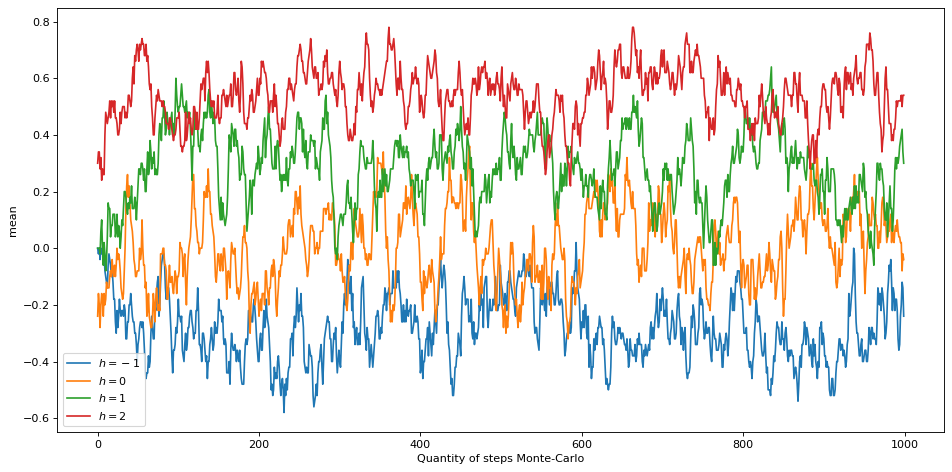

In [ ]:
H=np.array([-1,0,1,2])
plt.figure(figsize=(12, 6), dpi=80)
for i in range(len(H)):
    a=metropolis_fast(n_steps=10**4, lattice=100, beta=0.2, J=1, h=H[i])
    plt.plot(a,label="$h=%2.f$"%H[i])
    plt.legend(loc='best')
    plt.xlabel("Quantity of steps Monte-Carlo")
    plt.ylabel("mean")
plt.tight_layout()

<ipython-input-51-a27701a34c77>:18: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.sinh(betta*test_h))**2+np.exp(-4*betta*test_J))
<ipython-input-51-a27701a34c77>:18: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.sinh(betta*test_h))**2+np.exp(-4*betta*test_J))
<ipython-input-51-a27701a34c77>:18: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.sinh(betta*test_h))**2+np.exp(-4*betta*test_J))
<ipython-input-51-a27701a34c77>:18: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.sinh(betta*test_h))**2+np.exp(-4*betta*test_J))
<ipython-input-51-a27701a34c77>:18: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.sinh(betta*test_h))**2+np.exp(-4*betta*test_J))


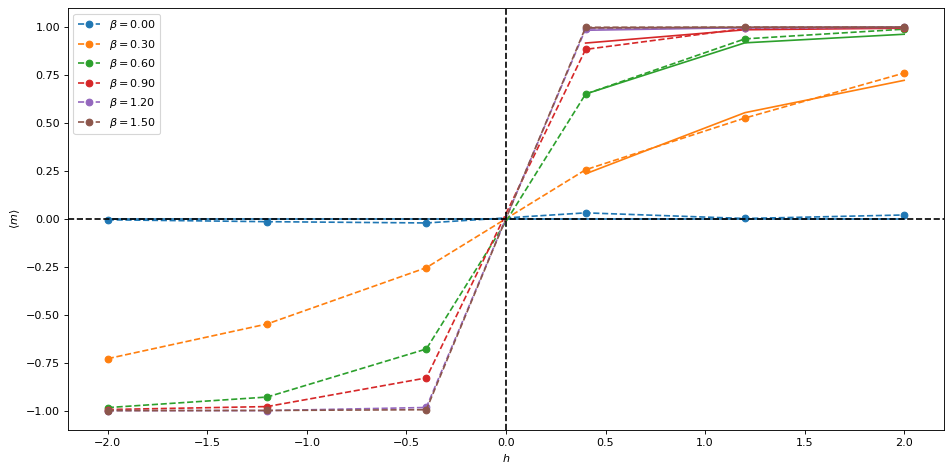

In [ ]:
test_lattice = 60
test_steps = test_lattice*100
test_J = 1
test_h = np.linspace(-2,2,6)
test_beta = np.linspace(0,1.5,6)

plt.figure(figsize=(12, 6), dpi=80)
for betta in test_beta:
    spin_vs_h = []
    for t_h in test_h:
        average_spin_at_h = metropolis_fast(test_steps, test_lattice, betta, test_J,t_h)
        mean_spin_from_trajectory = np.mean(average_spin_at_h[len(average_spin_at_h)//2:])
        spin_vs_h.append(mean_spin_from_trajectory)

    predicted_spin_v_h =(np.sinh(betta*test_h)+np.sinh(betta*test_h)*
                         np.cosh(betta*test_h)/np.sqrt((np.sinh(betta*test_h))**2
                         +np.exp(-4*betta*test_J)))/(np.cosh(betta*test_h)+ 
                         np.sqrt(np.sinh(betta*test_h))**2+np.exp(-4*betta*test_J))

    p = plt.plot(test_h,spin_vs_h,marker='o',label="$\\beta=%.2f$"%betta,linestyle='--')
    plt.plot(test_h,predicted_spin_v_h,label="",color=p[0].get_color())
    
plt.xlabel('$h$')
plt.ylabel('$\\langle m \\rangle$')
plt.axhline(0,linestyle='--',color='black')
plt.axvline(0,linestyle='--',color='black')
plt.legend(loc='best')

plt.tight_layout()

#2D

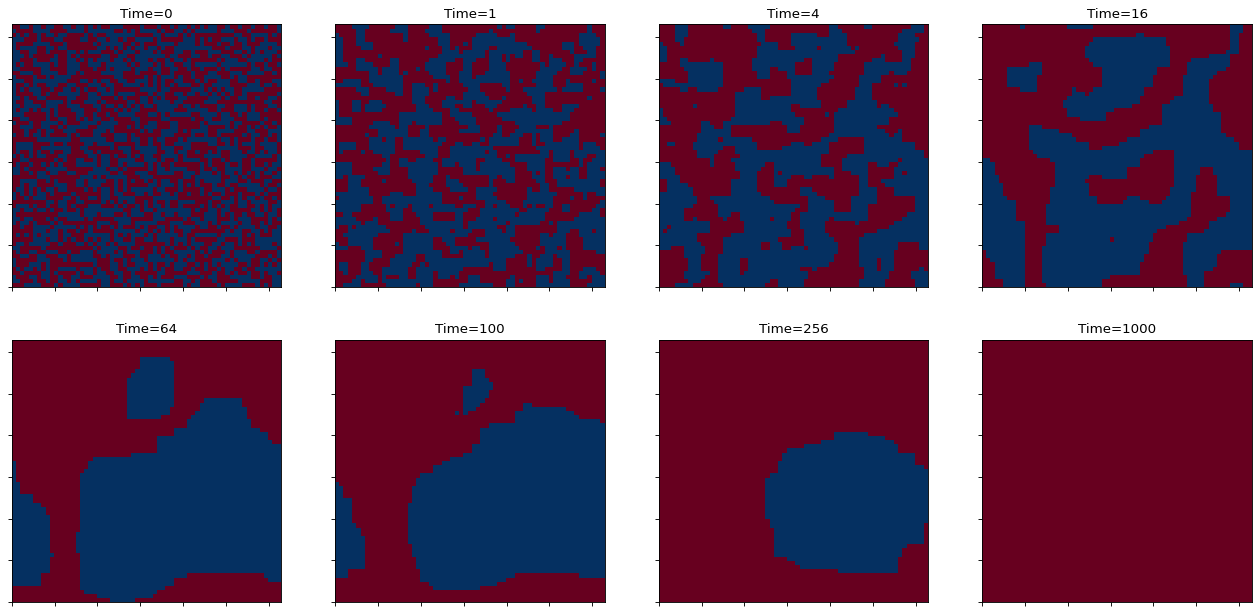

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class Ising():
    ''' Визуальная симуляция модели Изинга '''
    
    def init(N):
        ''' Генерация случайной конфигурации начального состояния спинов '''
        state = 2*np.random.randint(-1,1, size=(N,N))+1
        return state
    def mcmove(self, config, N, beta):
        ''' Метод Монте-Карло, алгоритм Метрополиса'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    w = 2*s*nb
                    if w < 0:	
                        s *= -1
                    elif np.random.rand() < np.exp(-w*beta):
                        s *= -1
                    config[a, b] = s
        return config
    def simulate(self):   
        N, temp     = 64, .2
        config = Ising.init(N)
        f = plt.figure(figsize=(20, 20), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        msrmnt = 1002
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0/temp)
            if i == 1:       self.configPlot(f, config, i, N, 2);
            if i == 4:       self.configPlot(f, config, i, N, 3);
            if i == 16:      self.configPlot(f, config, i, N, 4);
            if i == 64:      self.configPlot(f, config, i, N, 5);
            if i == 100:     self.configPlot(f, config, i, N, 6);
            if i == 256:     self.configPlot(f, config, i, N, 7);
            if i == 1000:    self.configPlot(f, config, i, N, 8);                    
    def configPlot(self, f, config, i, N, n):
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(4, 4, n)  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()
Ising().simulate()


In [ ]:
def Energy(config):
  energy=0.0
  for i in range(len(config)):
    for j in range(len(config)):
      s=config[i,j]
      n=config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
      energy += -n*s
    return energy/2
def Magnit(config):
  m=np.sum(config)
  return m
num_temp=64
N=20
T=np.linspace(0.1,5.0,num_temp)
E,M,C=np.zeros(num_temp),np.zeros(num_temp),np.zeros(num_temp)
MC_steps=2**8
Equilibr_steps=2**6
N1,N2=1.0/(MC_steps*N**2),1.0/(MC_steps*N*Equilibr_steps*N)
for i in range(num_temp):
  conf=Ising.init(N)
  E1=E2=M1=M2=0
  beta1=1.0/T[i]
  beta2=beta1**2
  for t in range(Equilibr_steps):
    Ising.mcmove(None,conf,N,beta1)
  for t in range(MC_steps):
    Ising.mcmove(None,conf,N,beta1)
    En=Energy(conf)
    Mag=Magnit(conf)
    E1=E1+En
    E2=E2+En**2
    M1=M1+Mag
    M2=M2+Mag**2
  E[i]=N1*E1
  M[i]=N1*M1
  C[i]=(N1*E2-N2*E1**2)*beta2  

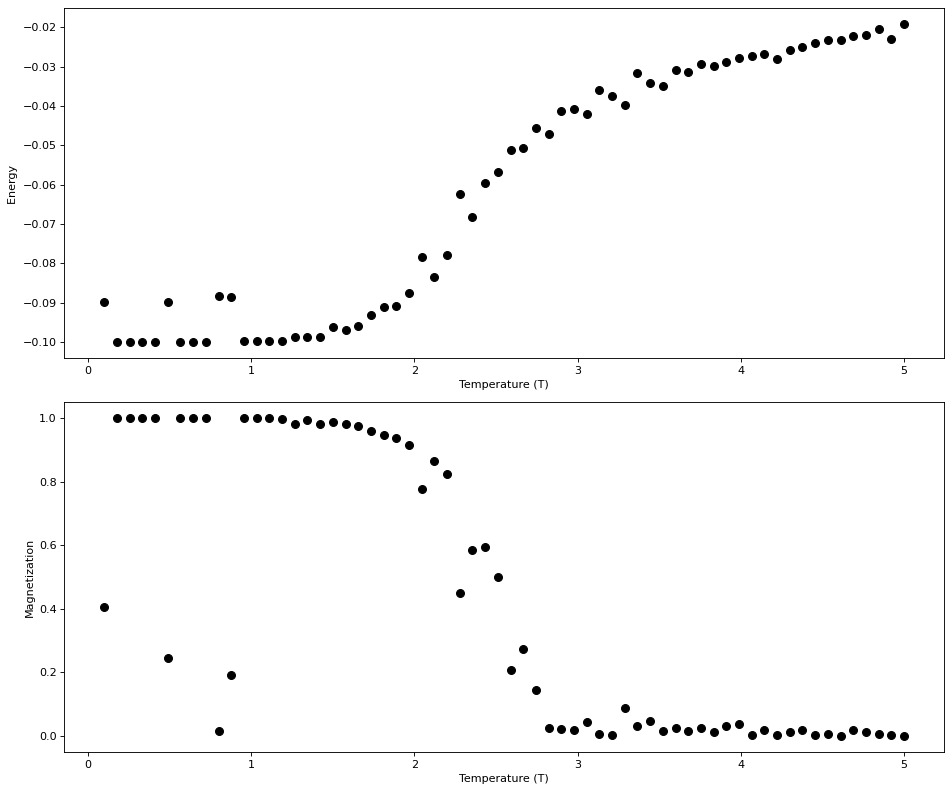

In [ ]:
plt.figure(figsize=(12, 10), dpi=80)
plt.subplot(2,1,1)
plt.scatter(T, E, s=50, marker='o', color='black')
plt.xlabel("Temperature (T)");
plt.ylabel("Energy ")
plt.subplot(2,1,2)
plt.scatter(T, abs(M), s=50, marker='o', color='black')
plt.xlabel("Temperature (T)");
plt.ylabel("Magnetization")
plt.tight_layout()